[[-3.14159265]
 [-3.01336438]
 [-2.88513611]
 [-2.75690784]
 [-2.62867957]
 [-2.5004513 ]
 [-2.37222302]
 [-2.24399475]
 [-2.11576648]
 [-1.98753821]
 [-1.85930994]
 [-1.73108167]
 [-1.60285339]
 [-1.47462512]
 [-1.34639685]
 [-1.21816858]
 [-1.08994031]
 [-0.96171204]
 [-0.83348377]
 [-0.70525549]
 [-0.57702722]
 [-0.44879895]
 [-0.32057068]
 [-0.19234241]
 [-0.06411414]
 [ 0.06411414]
 [ 0.19234241]
 [ 0.32057068]
 [ 0.44879895]
 [ 0.57702722]
 [ 0.70525549]
 [ 0.83348377]
 [ 0.96171204]
 [ 1.08994031]
 [ 1.21816858]
 [ 1.34639685]
 [ 1.47462512]
 [ 1.60285339]
 [ 1.73108167]
 [ 1.85930994]
 [ 1.98753821]
 [ 2.11576648]
 [ 2.24399475]
 [ 2.37222302]
 [ 2.5004513 ]
 [ 2.62867957]
 [ 2.75690784]
 [ 2.88513611]
 [ 3.01336438]
 [ 3.14159265]]


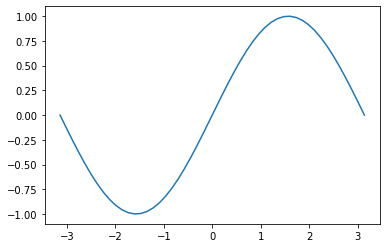

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# reshapeは配列の形状を変更できる。引数に-1を指定すると、自動で行や列の数が決まる。
x = np.linspace(-np.pi, np.pi).reshape(-1, 1)  # -πからπまで 
t = np.sin(x)  # sin関数

print(x)

plt.plot(x, t)
plt.show()

In [2]:
from keras.models import Sequential
from keras.layers import Dense

batch_size = 8  # バッチサイズ
n_in = 1  # 入力層のニューロン数
n_mid = 20  # 中間層のニューロン数
n_out = 1  # 出力層のニューロン数

# 入力層、中間層、出力層の３層のニューラルネットワークを構築
model = Sequential()
model.add(Dense(n_mid, input_shape=(n_in,), activation="sigmoid"))  # 活性化関数にシグモイド関数
model.add(Dense(n_out, activation="linear"))  # 活性化関数に恒等関数
model.compile(loss="mean_squared_error", optimizer="sgd")  # 損失関数に二乗誤差、最適化アルゴリズムにSGDを使用してコンパイル
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                40        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 21        
Total params: 61
Trainable params: 61
Non-trainable params: 0
_________________________________________________________________
None
2021-07-12 14:44:38.045282: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
history = model.fit(x, t, batch_size=batch_size, epochs=2000, validation_split=0.1)  # 10%のデータを検証用に使う

- loss: 0.0127 - val_loss: 0.1321
Epoch 1804/2000
6/6 [==============================] - 0s 8ms/step - loss: 0.0152 - val_loss: 0.1332
Epoch 1805/2000
6/6 [==============================] - 0s 9ms/step - loss: 0.0112 - val_loss: 0.1324
Epoch 1806/2000
6/6 [==============================] - 0s 11ms/step - loss: 0.0141 - val_loss: 0.1344
Epoch 1807/2000
6/6 [==============================] - 0s 11ms/step - loss: 0.0109 - val_loss: 0.1376
Epoch 1808/2000
6/6 [==============================] - 0s 7ms/step - loss: 0.0145 - val_loss: 0.1364
Epoch 1809/2000
6/6 [==============================] - 0s 7ms/step - loss: 0.0169 - val_loss: 0.1356
Epoch 1810/2000
6/6 [==============================] - 0s 13ms/step - loss: 0.0142 - val_loss: 0.1315
Epoch 1811/2000
6/6 [==============================] - 0s 11ms/step - loss: 0.0133 - val_loss: 0.1341
Epoch 1812/2000
6/6 [==============================] - 0s 8ms/step - loss: 0.0135 - val_loss: 0.1401
Epoch 1813/2000
6/6 [==============================] 

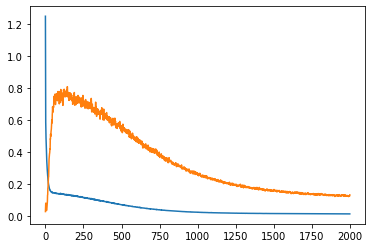

In [4]:
loss = history.history['loss']  # 訓練用データの誤差
vloss = history.history['val_loss']  # 検証用データの誤差

plt.plot(np.arange(len(loss)), loss)
plt.plot(np.arange(len(vloss)), vloss)
plt.show()

predict()メソッドにより、学習済みモデルを使用し予測を行うことができる

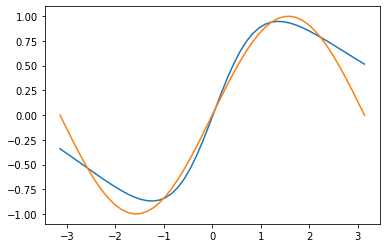

In [5]:
plt.plot(x, model.predict(x))  # モデルを使用し予測を行う
plt.plot(x, t)
plt.show()